In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ManifoldSculpting import ManifoldSculpting

In [11]:
def gen_roll(n):
    data = np.zeros((n,4))
    t = np.array([2+8*i/n for i in range(n)])
    data[:,0] = t*np.sin(t)
    data[:,2] = t*np.cos(t)
    data[:,1] = np.random.uniform(-6,6,n)
    data[:,3] = t
    return data

data = gen_roll(1000)
roll = data[:,:3].astype(np.float32)
phi = data[:,-1]

# roll = np.random.uniform(-5,5,(50,2)).astype(np.float32)

ms = ManifoldSculpting(k=6,sigma=0.95,niter=1,rotate=True)
ms.fit(roll)

keeping [0 1]
0 58 0.020285083778720146


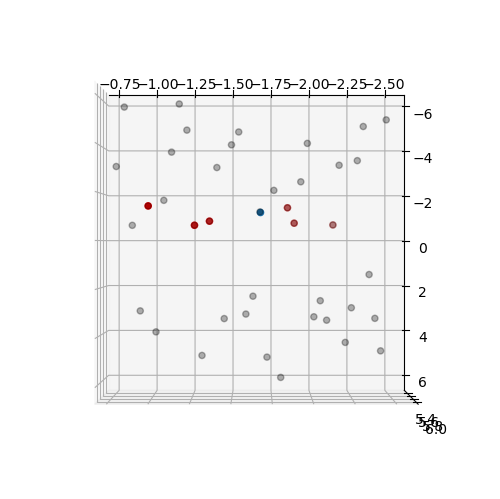

In [27]:
p = 500
fig = plt.figure()
ax = fig.add_axes([0,0,1,1],projection='3d')
ax.scatter3D(ms.data[p-20:p+20,0],ms.data[p-20:p+20,1],ms.data[p-20:p+20,2],c='k',alpha=0.3)
ax.scatter3D(ms.data[p,0],ms.data[p,1],ms.data[p,2])
ax.scatter3D(ms.data[ms.neighbours[p],0],ms.data[ms.neighbours[p],1],ms.data[ms.neighbours[p],2],c='r')
ax.view_init(90,90,0)

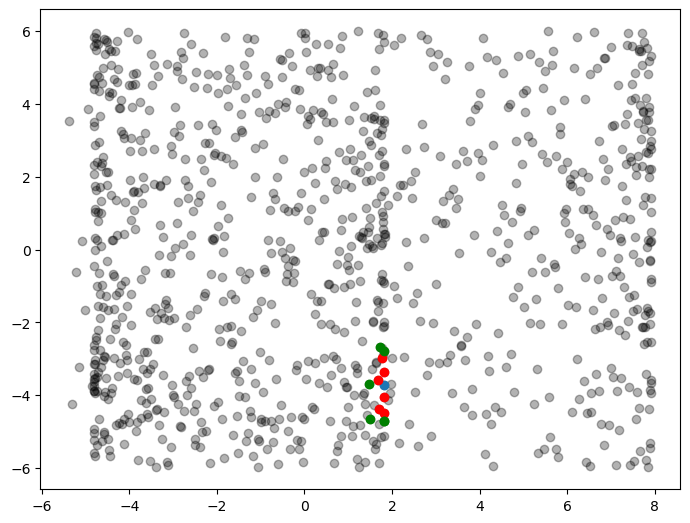

In [13]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.scatter(ms.data[:,0],ms.data[:,1],c='k',alpha=0.3)
ax2.scatter(ms.data[10,0],ms.data[10,1])
ax2.scatter(ms.data[ms.neighbours[10],0],ms.data[ms.neighbours[10],1],c='r')
ax2.scatter(ms.data[ms.colinear[10],0],ms.data[ms.colinear[10],1],c='g')